In [1]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam, SGD
import tensorflow as tf

In [2]:
num_classes = 6
img_rows, img_cols = 224, 224
batch_size = 32

train_data_dir = 'C:\\Users\\ryana\\SuperPalmOil45\\dataset_45\\training'
validation_data_dir = 'C:\\Users\\ryana\\SuperPalmOil45\\dataset_45\\validation'
testing_data_dir = 'C:\\Users\\ryana\\SuperPalmOil45\\dataset_45\\testing'

In [3]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        testing_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 3384 images belonging to 6 classes.
Found 584 images belonging to 6 classes.
Found 139 images belonging to 6 classes.


In [4]:
mobile_model = tf.keras.applications.MobileNetV2(include_top=False,weights='imagenet',input_shape=(224,224,3))
mobile_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [5]:
av1 = GlobalAveragePooling2D()(mobile_model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.3)(fc1)
fc2 = Dense(6,activation='softmax')(d1)

model_new = Model(mobile_model.input,fc2)
model_new.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [6]:
opt = SGD(lr=1e-4)
model_new.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
for ix in range(len(model_new.layers)):
    print(ix,model_new.layers[ix])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000002014E758070>
1 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000002014F83FC10>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002014F856250>
3 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002014F856E80>
4 <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000002014F8640A0>
5 <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000002014F9CDCA0>
6 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002014F9D75B0>
7 <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000002014F9D7070>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002014FA80460>
9 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002014FA64520>
10 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002014

In [8]:
for ix in range(72):
    model_new.layers[ix].trainable = False

model_new.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
model_new.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [9]:
callback=tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                          min_delta=0,
                                          patience=6,
                                          verbose=1,
                                          mode='auto',
                                          restore_best_weights=True)

In [10]:
history = model_new.fit(x=train_generator, 
                 validation_data=validation_generator,
                 epochs=200,
                 verbose=1,
                 callbacks=[callback])

Epoch 1/200
106/106 [==============================] - 174s 2s/step - loss: 2.1144 - accuracy: 0.1543 - val_loss: 1.9075 - val_accuracy: 0.2277
Epoch 2/200
106/106 [==============================] - 187s 2s/step - loss: 1.9068 - accuracy: 0.2063 - val_loss: 1.8278 - val_accuracy: 0.2757
Epoch 3/200
106/106 [==============================] - 190s 2s/step - loss: 1.7734 - accuracy: 0.2683 - val_loss: 1.7494 - val_accuracy: 0.2877
Epoch 4/200
106/106 [==============================] - 189s 2s/step - loss: 1.6617 - accuracy: 0.3259 - val_loss: 1.6803 - val_accuracy: 0.2774
Epoch 5/200
106/106 [==============================] - 189s 2s/step - loss: 1.5517 - accuracy: 0.3830 - val_loss: 1.6185 - val_accuracy: 0.3116
Epoch 6/200
106/106 [==============================] - 188s 2s/step - loss: 1.4698 - accuracy: 0.4149 - val_loss: 1.5609 - val_accuracy: 0.3459
Epoch 7/200
106/106 [==============================] - 189s 2s/step - loss: 1.3951 - accuracy: 0.4625 - val_loss: 1.5054 - val_accuracy:

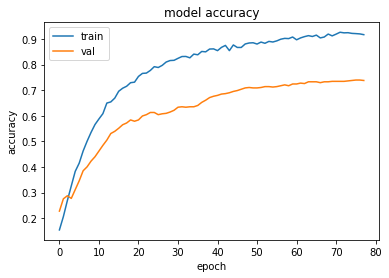

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
import matplotlib.pyplot as plt

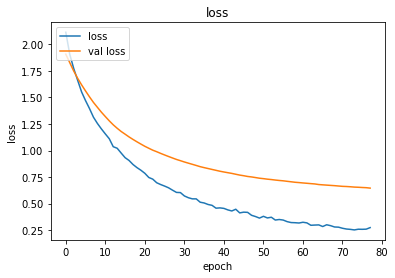

In [14]:
acc = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

In [15]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import pandas as pd

In [17]:
# ambil label true kelas di data training
y_true = test_generator.classes

# ambil label hasil prediksi (index maksimum, secara kolom)
y_pred = np.argmax(model_new.predict(test_generator), axis=-1)

# performa model di 
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.72      0.78      0.75        23
           2       0.59      0.77      0.67        26
           3       0.74      0.58      0.65        24
           4       0.80      0.70      0.74        23
           5       0.78      0.67      0.72        21

    accuracy                           0.73       139
   macro avg       0.74      0.73      0.73       139
weighted avg       0.74      0.73      0.73       139



In [18]:
cm = pd.DataFrame(confusion_matrix(y_true, y_pred)).rename_axis('Actual').rename_axis('Predicted', axis=1)
cm

Predicted,0,1,2,3,4,5
Actual,,,,,,
0,19,3,0,0,0,0
1,1,18,3,0,0,1
2,0,3,20,3,0,0
3,0,0,6,14,4,0
4,0,0,2,2,16,3
5,3,1,3,0,0,14


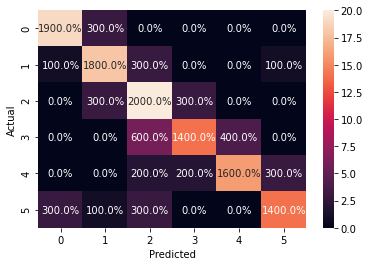

In [19]:
sns.heatmap(cm, annot=True, fmt=".1%")